In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [77]:
data = pd.read_csv('Data.csv')

In [78]:
X = data.iloc[:,:-1].values
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [79]:
Y = data.iloc[:,-1].values
Y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [82]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
y_pred = regressor.predict(poly_reg.fit_transform(X_test))

In [84]:
print(np.column_stack((Y_test,y_pred)))

[[432.58       435.67358712]
 [460.47       462.73328916]
 [463.64       463.07477235]
 ...
 [477.78       477.60069093]
 [456.29       455.99782371]
 [444.9        440.74611943]]


In [85]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9390379108513781

Best degree 4 with RMSE 4.1573993846510024


Text(0, 0.5, 'RMSE')

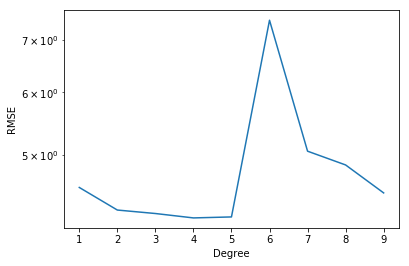

In [86]:
# predicting the degree for polynomial order selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rmses = []
min_rmse , min_deg = 1e10,0
degrees = np.arange(1,10)

for deg in degrees:
    #Train features
    poly_reg = PolynomialFeatures(degree=deg,include_bias=False)
    X_poly = poly_reg.fit_transform(X_train)
    
    #Linear regression
    regressor = LinearRegression()
    regressor.fit(X_poly,Y_train)
    
    #Compare with test data
    y_pred = regressor.predict(poly_reg.fit_transform(X_test))
    r2 = mean_squared_error(Y_test,y_pred)
    poly_rmse = np.sqrt(r2)
    rmses.append(poly_rmse)
    
    
    #Cross validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot the results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
    